## Imports

In [ ]:
!pip install numpy


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install opencv-python

     ---------------------------------------- 38.2/38.2 MB 5.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


https://erdogant.github.io/findpeaks/pages/html/Denoise.html


preprocessing steps:
- speckle filtering (Gamma MAP filter?)
- edge detection (Sobel Filter
- feature extraction (Hough Transform?)

In [ ]:
import numpy as np
from pathlib import Path
import cv2
import os

In [5]:
import numpy as np
import cv2
import sys
sys.path.append('/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src')
import gamma_filter as gamma_filter

k = 0
m = 3

easy_image = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/easy_example.tif',cv2.IMREAD_GRAYSCALE)
easy_image = np.array([easy_image])
easy_image = gamma_filter.gamma_filter(k,easy_image,256,256,m)
np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/easy_image.npy', easy_image)

medium_image = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/medium_example.tif',cv2.IMREAD_GRAYSCALE)
medium_image = np.array([medium_image])
medium_image = gamma_filter.gamma_filter(k,medium_image,256,256,m)
np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/medium_image.npy', medium_image)

hard_image = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/hard_example.tif',cv2.IMREAD_GRAYSCALE)
hard_image = np.array([hard_image])
hard_image = gamma_filter.gamma_filter(k,hard_image,256,256,m)
np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/hard_image.npy',hard_image)

very_hard_image = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/very_hard_example.tif',cv2.IMREAD_GRAYSCALE)
very_hard_image = np.array([very_hard_image])
very_hard_image = gamma_filter.gamma_filter(k,very_hard_image,256,256,m)
np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/very_hard_image.npy',very_hard_image)

easy_label = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/easy_label.tif',cv2.IMREAD_GRAYSCALE)/255.0
medium_label = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/medium_label.tif',cv2.IMREAD_GRAYSCALE)/255.0
hard_label = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/hard_label.tif',cv2.IMREAD_GRAYSCALE)/255.0
very_hard_label = cv2.imread('/content/drive/MyDrive/439D PROJECT/images for human survey/very_hard_label.tif',cv2.IMREAD_GRAYSCALE)/255.0

np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/easy_label.npy',easy_label)
np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/medium_label.npy',medium_label)
np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/hard_label.npy',hard_label)
np.save('/content/drive/MyDrive/439D PROJECT/images for human survey/very_hard_label.npy',very_hard_label)

/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:91: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[1,0]) < np.abs(w[1,1]-w[1,2]):
/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:106: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[0,0]) < np.abs(w[1,1]-w[2,2]):
/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:101: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[0,1]) < np.abs(w[1,1]-w[2,1]):
/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:96: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[2,0]) < np.abs(w[1,1]-w[0,2]):


band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250


/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  alpha = (1 +1.0/m)/(var/mu**2 - 1/m)
/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:118: RuntimeWarning: invalid value encountered in double_scalars
  x = (a+np.sqrt(4*g*m*alpha*mu+a**2))/(2*alpha)


band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250


In [ ]:
import numpy as np
from pathlib import Path
from glob import glob
from osgeo import gdal
import cv2
from google.colab.patches import cv2_imshow as show
import matplotlib.pyplot as plt
import os

ModuleNotFoundError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Final Preprocessing
code for the final preprocessing of the whole dataset one we decide on a final method. dont run before then

In [ ]:
#dont run yet
filenames = []
SAR = []
labels = []
for file in Path("439D PROJECT/SARBuD Dataset/images").iterdir():
    if not file.is_file():
        continue
    filenames.append(file.name)
filenames = sorted(filenames)

for name in filenames:
  #print('w')
  img_path = "439D PROJECT/SARBuD Dataset/images/" + name
  #print(img_path)
  #label_path = "439D PROJECT/SARBuD Dataset/Labelimgs/" + name
  img_cv2 = cv2.imread(img_path, 0)
  #label_cv2 = cv2.imread(label_path, 0)
  SAR.append(img_cv2)
  print("file appended")
  #labels.append(label_cv2)

  

Streaming output truncated to the last 5000 lines.
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file appended
file append

In [ ]:
print(SAR[2248][1].shape)

(256,)


In [ ]:
SAR_np = np.array(SAR[0:2247])
np.save('439D PROJECT/processed data/SAR.npy', SAR_np)

## save first 5k images

In [ ]:
!pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 42.2/42.2 MB 5.2 MB/s eta 0:00:00


In [ ]:
#running this cell would apply the filter to all pictures - will take a long time, dont run until we are ready
import sys
from osgeo import gdal
from glob import glob
sys.path.append('439D PROJECT/gamma filter repo/SARDocker/src')
import gamma_filter as gamma_filter

#gamma filter parameters
k = 0
m = 3

filtered_arrays = []
normalized_labels = []

for image in SAR[:5000]:
  if image is None:
    continue
  input_gamma = np.array([image])
  gamma_filtered = gamma_filter.gamma_filter(k,input_gamma,256,256,m)
  filtered_arrays.append(gamma_filtered)

  # label = label/255
  # label = label.astype(np.int32)
  # normalized_labels.append(label)


filtered_arrays = np.array(filtered_arrays)
# normalized_labels = np.array(normalized_labels)

np.save('439D PROJECT/processed data/imgs_1.npy', filtered_arrays)
# np.save('439D PROJECT/processed data/labels_1.npy', normalized_labels)

band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100


G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:114: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = (1 +1.0/m)/(var/mu**2 - 1/m)
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:118: RuntimeWarning: invalid value encountered in scalar divide
  x = (a+np.sqrt(4*g*m*alpha*mu+a**2))/(2*alpha)
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:119: RuntimeWarning: invalid value encountered in cast
  result[j,i] = x


Streaming output truncated to the last 5000 lines.
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
b

##save second 5k images



In [ ]:
#running this cell would apply the filter to all pictures - will take a long time, dont run until we are ready
import sys
from osgeo import gdal
from glob import glob
sys.path.append('439D PROJECT/gamma filter repo/SARDocker/src')
import gamma_filter as gamma_filter

#gamma filter parameters
k = 0
m = 3

filtered_arrays = []
normalized_labels = []
issues = []

counter = 5001

for image in SAR[5001:10000]:
  if image is None:
    issues.append(counter)
    continue
  input_gamma = np.array([image])
  gamma_filtered = gamma_filter.gamma_filter(k,input_gamma,256,256,m)
  filtered_arrays.append(gamma_filtered)
  counter = counter + 1
  # label = label/255
  # label = label.astype(np.int32)
  # normalized_labels.append(label)

issues_array = np.array(issues)
filtered_arrays = np.array(filtered_arrays)
# normalized_labels = np.array(normalized_labels)
np.save('439D PROJECT/processed data/issues_2.npy', issues_array)
np.save('439D PROJECT/processed data/imgs_2.npy', filtered_arrays)
# np.save('439D PROJECT/processed data/labels_2.npy', normalized_labels)

G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:96: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[2,0]) < np.abs(w[1,1]-w[0,2]):
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:106: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[0,0]) < np.abs(w[1,1]-w[2,2]):
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:91: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[1,0]) < np.abs(w[1,1]-w[1,2]):
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:101: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[0,1]) < np.abs(w[1,1]-w[2,1]):


band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 

G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:114: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = (1 +1.0/m)/(var/mu**2 - 1/m)
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:118: RuntimeWarning: invalid value encountered in scalar divide
  x = (a+np.sqrt(4*g*m*alpha*mu+a**2))/(2*alpha)
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:119: RuntimeWarning: invalid value encountered in cast
  result[j,i] = x


Streaming output truncated to the last 5000 lines.
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
b

G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:118: RuntimeWarning: invalid value encountered in scalar multiply
  x = (a+np.sqrt(4*g*m*alpha*mu+a**2))/(2*alpha)


Streaming output truncated to the last 5000 lines.
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
b

##save 3rd 5k images


In [ ]:
#running this cell would apply the filter to all pictures - will take a long time, dont run until we are ready
import sys
from osgeo import gdal
from glob import glob
sys.path.append('439D PROJECT/gamma filter repo/SARDocker/src')
import gamma_filter as gamma_filter

#gamma filter parameters
k = 0
m = 3

filtered_arrays = []
normalized_labels = []
issues = []

counter = 10001

for image in SAR[10001:15000]:
  if image is None:
    issues.append(counter)
    continue
  input_gamma = np.array([image])
  gamma_filtered = gamma_filter.gamma_filter(k,input_gamma,256,256,m)
  filtered_arrays.append(gamma_filtered)
  counter = counter + 1
  # label = label/255
  # label = label.astype(np.int32)
  # normalized_labels.append(label)

issues_array = np.array(issues)
filtered_arrays = np.array(filtered_arrays)
# normalized_labels = np.array(normalized_labels)
np.save('439D PROJECT/processed data/issues_3.npy', issues_array)
np.save('439D PROJECT/processed data/imgs_3.npy', filtered_arrays)
# np.save('439D PROJECT/processed data/labels_3.npy', normalized_labels)

Streaming output truncated to the last 5000 lines.
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
b

##save 4th 5k images

In [ ]:
#running this cell would apply the filter to all pictures - will take a long time, dont run until we are ready
import sys
from osgeo import gdal
from glob import glob
sys.path.append('439D PROJECT/gamma filter repo/SARDocker/src')
import gamma_filter as gamma_filter

#gamma filter parameters
k = 0
m = 3

filtered_arrays = []
normalized_labels = []
issues = []

counter = 15001

for image in SAR[15001:20000]:
  if image is None:
    issues.append(counter)
    continue
  input_gamma = np.array([image])
  gamma_filtered = gamma_filter.gamma_filter(k,input_gamma,256,256,m)
  filtered_arrays.append(gamma_filtered)
  counter = counter + 1
  # label = label/255
  # label = label.astype(np.int32)
  # normalized_labels.append(label)

issues_array = np.array(issues)
filtered_arrays = np.array(filtered_arrays)
# normalized_labels = np.array(normalized_labels)
np.save('439D PROJECT/processed data/issues_4.npy', issues_array)
np.save('439D PROJECT/processed data/imgs_4.npy', filtered_arrays)
# np.save('439D PROJECT/processed data/labels_4.npy', normalized_labels)

Streaming output truncated to the last 5000 lines.
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
b

##save 5th 5k images

In [ ]:
#running this cell would apply the filter to all pictures - will take a long time, dont run until we are ready
import sys
from osgeo import gdal
from glob import glob
sys.path.append('439D PROJECT/gamma filter repo/SARDocker/src')
import gamma_filter as gamma_filter

#gamma filter parameters
k = 0
m = 3

filtered_arrays = []
normalized_labels = []
issues = []

counter = 20001

for image in SAR[20001:25000]:
  if image is None:
    issues.append(counter)
    continue
  input_gamma = np.array([image])
  try:
    gamma_filtered = gamma_filter.gamma_filter(k,input_gamma,256,256,m)
  except Exception:
    issues.append(counter)
    continue
  filtered_arrays.append(gamma_filtered)
  counter = counter + 1
  print(counter)
  # label = label/255
  # label = label.astype(np.int32)
  # normalized_labels.append(label)

issues_array = np.array(issues)
filtered_arrays = np.array(filtered_arrays)
# normalized_labels = np.array(normalized_labels)
np.save('439D PROJECT/processed data/issues_5.npy', issues_array)
np.save('439D PROJECT/processed data/imgs_5.npy', filtered_arrays)
# np.save('439D PROJECT/processed data/labels_5.npy', normalized_labels)

G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:91: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[1,0]) < np.abs(w[1,1]-w[1,2]):
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:101: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[0,1]) < np.abs(w[1,1]-w[2,1]):
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:106: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[0,0]) < np.abs(w[1,1]-w[2,2]):
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:96: RuntimeWarning: overflow encountered in scalar subtract
  if np.abs(w[1,1]-w[2,0]) < np.abs(w[1,1]-w[0,2]):


band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20002
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20003
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20004
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20005
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20006
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20007
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20008
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20009
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20010
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20011
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20012
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
ba

G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:114: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = (1 +1.0/m)/(var/mu**2 - 1/m)
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:118: RuntimeWarning: invalid value encountered in scalar divide
  x = (a+np.sqrt(4*g*m*alpha*mu+a**2))/(2*alpha)
G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:119: RuntimeWarning: invalid value encountered in cast
  result[j,i] = x


band 1  row 250
20016
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20017
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20018
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20019
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20020
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20021
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20022
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20023
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20024
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20025
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20026
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
20027
band 1  row 50
band 1  row 100
band 1  row 

G:\.shortcut-targets-by-id\1rmNs1JhiqsQuioYsunfIebsdXXsJci85\439D PROJECT/gamma filter repo/SARDocker/src\gamma_filter.py:118: RuntimeWarning: invalid value encountered in scalar multiply
  x = (a+np.sqrt(4*g*m*alpha*mu+a**2))/(2*alpha)


Streaming output truncated to the last 5000 lines.
band 1  row 250
23913
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23914
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23915
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23916
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23917
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23918
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23919
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23920
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23921
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23922
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
23923
band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 25

In [ ]:
issues_array.shape
filtered_arrays.shape

(4745, 256, 256)

In [ ]:
np.save('439D PROJECT/processed data/imgs_5.npy', filtered_arrays)

##load in saved images, concatenate, train test split

In [ ]:
from sklearn.model_selection import train_test_split
imgs_1 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/imgs_1.npy')
imgs_2 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/imgs_2.npy')
imgs_3 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/imgs_3.npy')
imgs_5 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/imgs_4.npy')
imgs_1 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/imgs_5.npy')

labels_1 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/labels_1.npy')
labels_1 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/labels_2.npy')
labels_1 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/labels_3.npy')
labels_1 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/labels_4.npy')
labels_1 = np.load('/content/drive/MyDrive/439D PROJECT/processed data/labels_5.npy')

img_train,img_test,label_train,label_test = train_test_split(filtered_arrays,normalized_labels)

np.save('/content/drive/MyDrive/439D PROJECT/processed data/training images.npy', img_train)
np.save('/content/drive/MyDrive/439D PROJECT/processed data/validation images.npy', img_test)
np.save('/content/drive/MyDrive/439D PROJECT/processed data/training labels.npy', label_train)
np.save('/content/drive/MyDrive/439D PROJECT/processed data/test_labels.npy', label_test)

In [ ]:
print(img_train.shape)
print("=========")
print(img_test.shape)
print("=========")
print(label_train.shape)
print("=========")
print(label_test.shape)

(12, 256, 256)
(4, 256, 256)
(12, 256, 256)
(4, 256, 256)


##Example image

In [ ]:
from PIL import Image

filename = '/content/drive/MyDrive/439D PROJECT/SARBuD Dataset/images/jingjinji0501HH_43_15.tif'
channel = Image.open(filename)

filename_2 = '/content/drive/MyDrive/439D PROJECT/SARBuD Dataset/Labelimgs/jingjinji0501HH_43_15.tif'
label = Image.open(filename_2)

channel = np.array(img)
label1 = np.array(label)

print('data pixel values')
print(np.unique(channel))
print('label pixel values')
print(np.unique(label))
print('shapes: ', channel.shape, label1.shape)

data pixel values
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 

##Kuan filter method
apply a kuan filter to the raw SAR image then apply sobel filtering  to detect edges

Original Image


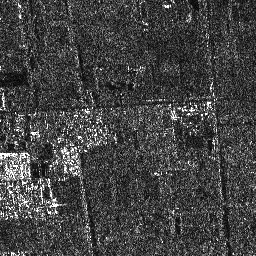

Kuan Filtered Image


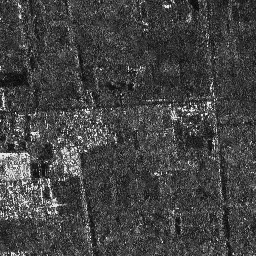

Sobel Filtering via cv2


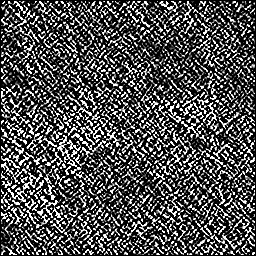

Sobel Filtering via scipy convolve


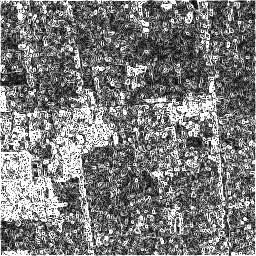

In [ ]:
from scipy.signal import convolve2d
#driver_gtiff = gdal.GetDriverByName('GTiff')
#ds = SAR[1][0]
#filename = '/content/drive/MyDrive/kuan_edge_test_3.tif'
#ds_filtered = driver_gtiff.CreateCopy(filename,ds)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

#kuan filter parameters
winsize = 7
cu_value = 0.25

channel = ds.GetRasterBand(1).ReadAsArray()
channel_kuan = findpeaks.kuan_filter(channel, win_size=winsize, cu=cu_value)
channel_x = convolve2d(channel_kuan,sobel_x,mode='same')
channel_y = convolve2d(channel_kuan,sobel_y,mode='same')
grad_norm = np.sqrt((channel_x**2)+(channel_y**2))

# maybe try ddepth value CV_16s
sobelxy = cv2.Sobel(src=channel_kuan,ddepth=cv2.CV_64F,dx=1,dy=1,ksize=5)

#edges = cv2.Canny(image=channel_kuan, threshold1=100, threshold2=200)
#ds_filtered.GetRasterBand(1).WriteArray(sobelxy)

#ds_filtered = None


print("Original Image")
show(channel)
print("Kuan Filtered Image")
show(channel_kuan)
print("Sobel Filtering via cv2")
show(sobelxy)
print("Sobel Filtering via scipy convolve")
show(grad_norm)

# average filter to reduceing image and sharpen **image**

using 2 by 2 average keneal


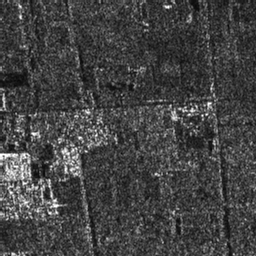

using prewitt matrix


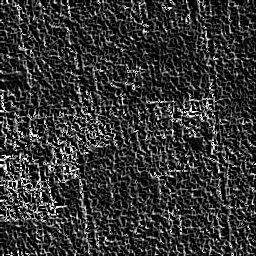

In [ ]:
twobytwo=np.ones((2,2),np.float32)/4
channel_2by2=cv2.filter2D(channel,-1,twobytwo)
print("using 2 by 2 average keneal")
show(channel_2by2)

#edge detetion Prewitt Masks 

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(channel_2by2, -1, kernelx)
img_prewitty = cv2.filter2D(channel_2by2, -1, kernely)
print("using prewitt matrix")
show( img_prewittx + img_prewitty)



CANNY (REPLACEING Sobel ) without any filtering 


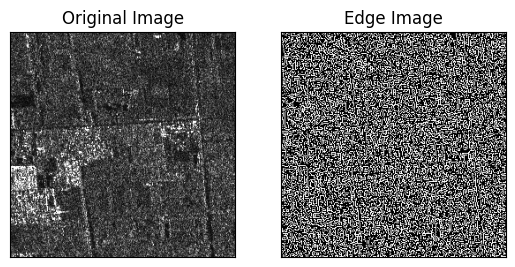

In [ ]:
canny_edges = cv2.Canny(channel,100,200)
plt.subplot(121),plt.imshow(channel,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#Median Filtering
apply a median filter and then edge detection

Original Image


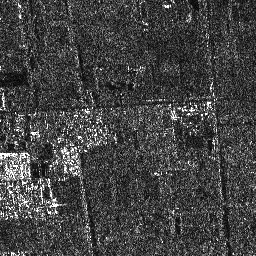

edge detection on original


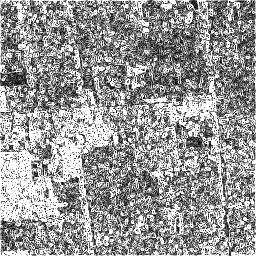

Median Filtered Image


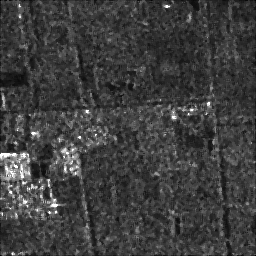

Edge Detection on Median Filtered Image


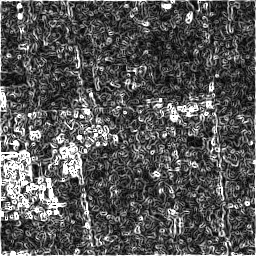

building Mask Label


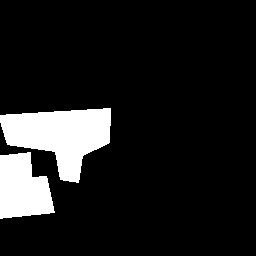

In [ ]:
from scipy.signal import medfilt
channel_med = medfilt(channel, kernel_size=3)
channel_x = convolve2d(channel_med,sobel_x,mode='same')
channel_y = convolve2d(channel_med,sobel_y,mode='same')
grad_norm = np.sqrt((channel_x**2)+(channel_y**2))

x = convolve2d(channel,sobel_x,mode='same')
y = convolve2d(channel,sobel_y,mode='same')
grad = np.sqrt((x**2)+(y**2))
print("Original Image")
show(channel)
print('edge detection on original')
show(grad)
print("Median Filtered Image")
show(channel_med)
print("Edge Detection on Median Filtered Image")
show(grad_norm)
print("building Mask Label")
show(label)

average of median filters


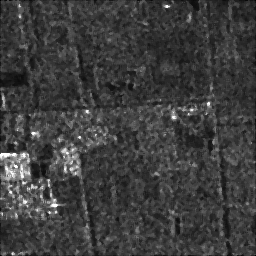

edges


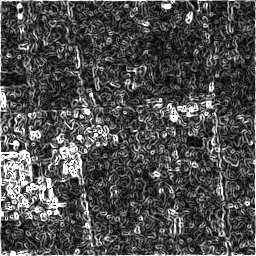

In [ ]:
#idea - average median filtered images with different kernel sizes
med1 = medfilt(channel,kernel_size=3)
med2 = medfilt(med1,kernel_size=3)
med3 = medfilt(med2,kernel_size=3)

med_av = 0.7*med1 + +0.2*med2 + 0.1*med3

channel_x = convolve2d(med_av,sobel_x,mode='same')
channel_y = convolve2d(med_av,sobel_y,mode='same')
grad_norm = np.sqrt((channel_x**2)+(channel_y**2))

print('average of median filters')
show(med_av)
print('edges')
show(grad_norm)

Original Image


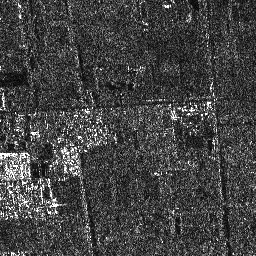

edge detection on original


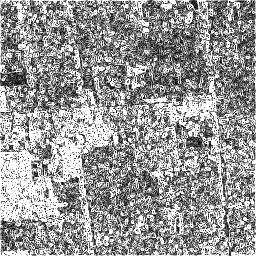

Median-Kuan Filtered Image


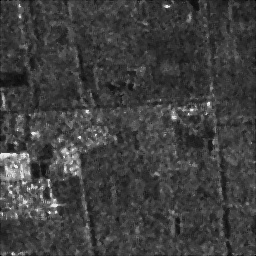

Edge Detection on Median-Kuan Filtered Image


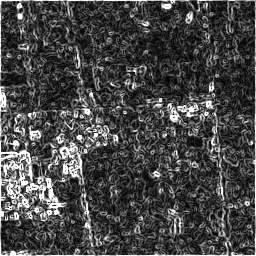

building Mask Label


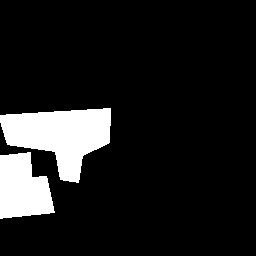

In [ ]:
#apply kuan and then a median filter
from scipy.signal import medfilt

channel = ds.GetRasterBand(1).ReadAsArray()
channel_kuan = findpeaks.kuan_filter(channel, win_size=winsize, cu=cu_value)
channel_med = medfilt(channel_kuan, kernel_size=3)
channel_x = convolve2d(channel_med,sobel_x,mode='same')
channel_y = convolve2d(channel_med,sobel_y,mode='same')
grad_norm = np.sqrt((channel_x**2)+(channel_y**2))

print("Original Image")
show(channel)
print('edge detection on original')
show(grad)
print("Median-Kuan Filtered Image")
show(channel_med)
print("Edge Detection on Median-Kuan Filtered Image")
show(grad_norm)
print("building Mask Label")
show(label)

##Gaussian Blur

gaussian blur


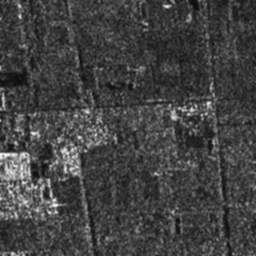

canny edges on gaussian blur


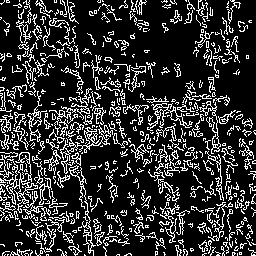

In [ ]:
from scipy.ndimage.filters import gaussian_filter

channel_gaussian = gaussian_filter(channel,1,radius=1)
channel_x = convolve2d(channel_gaussian,sobel_x,mode='same')
channel_y = convolve2d(channel_gaussian,sobel_y,mode='same')
grad_gaussian = np.sqrt((channel_x**2)+(channel_y**2))
canny_edges = cv2.Canny(channel_gaussian,100,200)
print("gaussian blur")
show(channel_gaussian)
print('canny edges on gaussian blur')
show(canny_edges)

##Max Filtering

maximum filtering


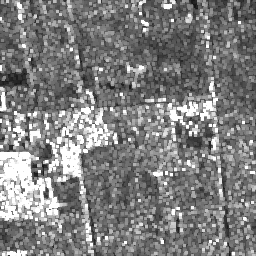

edges on maximum filtering


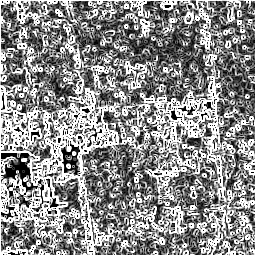

In [ ]:
from scipy.ndimage import maximum_filter

channel_max = maximum_filter(channel,size=3)
channel_x = convolve2d(channel_max,sobel_x,mode='same')
channel_y = convolve2d(channel_max,sobel_y,mode='same')
grad_max = np.sqrt((channel_x**2)+(channel_y**2))

print("maximum filtering")
show(channel_max)
print("edges on maximum filtering")
show(grad_max)

In [ ]:
#kuan then maximum filter

channel_max_kuan = maximum_filter(channel_kuan,size=3)
channel_x = convolve2d(channel_max_kuan,sobel_x,mode='same')
channel_y = convolve2d(channel_max_kuan,sobel_y,mode='same')
grad_max_kuan = np.sqrt((channel_x**2)+(channel_y**2))

canny_max_edges = cv2.Canny(channel_max_kuan,100,200)
print("maximum-kuan filtering")
show(channel_max_kuan)
print("edges on maximum-kuan filtering")
show(canny_max_edges)

error: ignored

##Gamma Map Filtering

In [ ]:
%cd /content/drive/MyDrive/439D PROJECT/gamma filter repo
!git clone https://github.com/mortcanty/SARDocker

/content/drive/MyDrive/439D PROJECT/gamma filter repo
fatal: destination path 'SARDocker' already exists and is not an empty directory.


/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:106: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[0,0]) < np.abs(w[1,1]-w[2,2]):
/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:91: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[1,0]) < np.abs(w[1,1]-w[1,2]):
/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:101: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[0,1]) < np.abs(w[1,1]-w[2,1]):
/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src/gamma_filter.py:96: RuntimeWarning: overflow encountered in ubyte_scalars
  if np.abs(w[1,1]-w[2,0]) < np.abs(w[1,1]-w[0,2]):


band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
original


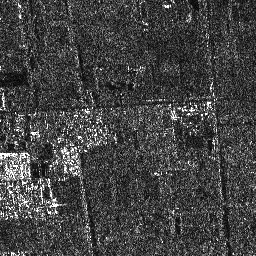

gamma map filtered image


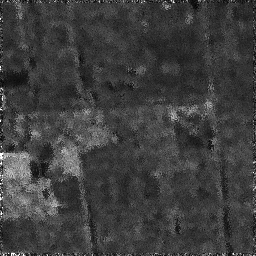

(256, 256)
canny edge detection on gamma map filtered image


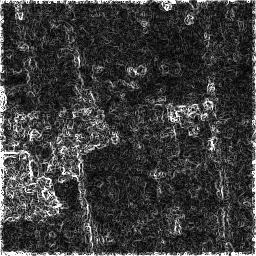

In [ ]:
import sys
from scipy.signal import convolve2d
sys.path.append('/content/drive/MyDrive/439D PROJECT/gamma filter repo/SARDocker/src')
import gamma_filter

k=0
m=3
input_gamma_channel = np.array([channel])
channel_gamma = gamma_filter.gamma_filter(k,input_gamma_channel,256,256,m)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

channel_x = convolve2d(channel_gamma,sobel_x,mode='same')
channel_y = convolve2d(channel_gamma,sobel_y,mode='same')
grad_gamma = np.sqrt((channel_x**2)+(channel_y**2))

canny_edges = cv2.Canny(channel_gamma,100,200)

print("original")
show(channel)
print("gamma map filtered image")
show(channel_gamma)
print(channel_gamma.shape)
print("canny edge detection on gamma map filtered image")
show(grad_gamma)

band 1  row 50
band 1  row 100
band 1  row 150
band 1  row 200
band 1  row 250
median-gamma map filtered image


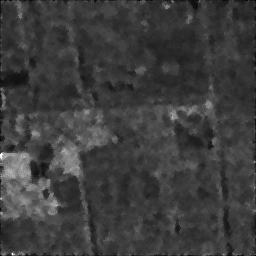

edge detection on median-gamma map filtered image


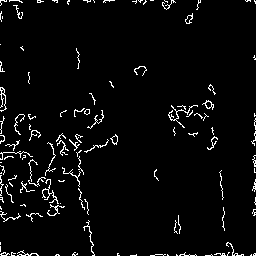

In [ ]:
from scipy.signal import medfilt

k=0
m=3
input_gamma_channel = np.array([channel])
channel_gamma = gamma_filter.gamma_filter(k,input_gamma_channel,ds.RasterXSize,ds.RasterYSize,m)
channel_gamma_med = medfilt(channel_gamma,kernel_size=3)
channel_x = convolve2d(channel_gamma_med,sobel_x,mode='same')
channel_y = convolve2d(channel_gamma_med,sobel_y,mode='same')
grad_gamma_med = np.sqrt((channel_x**2)+(channel_y**2))
canny_edges = cv2.Canny(channel_gamma_med,100,200)

print("median-gamma map filtered image")
show(channel_gamma_med)
print("edge detection on median-gamma map filtered image")
show(grad_gamma_med)

In [ ]:
#Hough Transform line detection
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
lines1 = probabilistic_hough_line(grad_gamma, threshold=10, line_length=10,
                                 line_gap=3)
lines2 =probabilistic_hough_line(canny_edges, threshold=40, line_length=20,
                                 line_gap=3)

fig, ax = plt.subplots(1,3,figsize=(30,10))
ax[0].imshow(channel_gamma,cmap=cm.gray)
ax[0].set_title("gamma MAP filter")

ax[1].imshow(grad_gamma*0)
for line in lines1:
  p0, p1 = line
  ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))

ax[1].set_title('Probabilistic Hough on Sobel edge detection')

ax[2].imshow(canny_edges*0)
for line in lines2:
  p0, p1 = line
  ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))

ax[2].set_title('Probabilistic Hough on canny edge detection')

Output hidden; open in https://colab.research.google.com to view.